In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#To load dataset bank.csv
df=pd.read_csv("bank.csv")
#to display first 5 records
df.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   59    0        1          1        0     2343        1     0        2   
1   56    0        1          1        0       45        0     0        2   
2   41    9        1          1        0     1270        1     0        2   
3   55    7        1          1        0     2476        1     0        2   
4   54    0        1          2        0      184        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  deposit  
0    5      8      1042         1     -1         0         3        1  
1    5      8      1467         1     -1         0         3        1  
2    5      8      1389         1     -1         0         3        1  
3    5      8       579         1     -1         0         3        1  
4    5      8       673         2     -1         0         3        1

In [3]:
#Here target : deposit that means we have predict whether the customer will 
#subscribe the term deposit or not .

In [4]:
#Analysis on Given Dataset
#HOW many categories on output column deposit 
df["deposit"].unique()

array([1, 0], dtype=int64)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


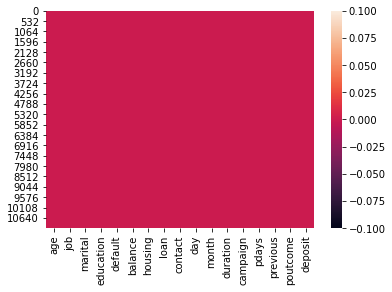

In [5]:
#Check null values
print(df.isnull().sum())
#visualise 
sns.heatmap(df.isnull())
plt.show()

In [6]:
#Select input and output variable from dataset
X=df.drop("deposit",axis=1) #select all input features except deposit
#or X=df.iloc[:,:-1]
Y=df["deposit"] #select target means output variable or Y=df.iloc[:,-1]

In [7]:
#Train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [8]:
#First apply scaling on input data before train the data
#Apply standard scaler for input data training and testing

from sklearn.preprocessing import StandardScaler
#Create a object of StandardScaler class
ss=StandardScaler()
#means apply standard scaler for X_train data
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [9]:
#create a function
def create_model(model): 
    model.fit(X_train,Y_train) #train the model
    Y_pred=model.predict(X_test) #test the model
    print(classification_report(Y_test,Y_pred))
    print(confusion_matrix(Y_test,Y_pred))
    return model

In [10]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [11]:
#Use Random Forest Tree 
'''
Train the dataset on multiple decisiontreeclassifier algorithm 
'''
#Random Forest Tree 
#call Random Forest Tree from package
from sklearn.ensemble import RandomForestClassifier
#ensemble means to train the same dataset from multiple algorithm 


In [12]:
#create object of RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,max_features=8,random_state=1)
#here n_estimators means take how many no. of decisiontree 
#max_features means take how many input 

In [13]:
X.shape

(11162, 16)

In [14]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')

In [15]:
#call function
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1760
           1       0.82      0.83      0.83      1589

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349

[[1477  283]
 [ 266 1323]]


In [16]:
#show the information gain of all input features 
IG=rfc.feature_importances_
I=X.columns
d={'Input Column':I,'Information Gain':IG}
#converts into dataframe
F=pd.DataFrame(d)
F.sort_values('Information Gain',ascending=False)

Input Column  Information Gain
11     duration          0.377248
5       balance          0.087229
0           age          0.086324
10        month          0.084157
9           day          0.069040
13        pdays          0.052526
15     poutcome          0.043532
8       contact          0.038556
1           job          0.035491
6       housing          0.033234
12     campaign          0.027532
3     education          0.019993
2       marital          0.017811
14     previous          0.016155
7          loan          0.010069
4       default          0.001102